<a href="https://colab.research.google.com/github/Sohail1173/Sohail1173-Outliers-Removal----Zscore-IQR-/blob/main/Outliers_Removal_Complete_Guide_(_Zscore_%2C_IQR_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outliers Handling
# Inter-Quartile Range (IQR)-->For left or right skewed data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
data=pd.read_csv("/content/placement.csv")

In [ ]:
data.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [ ]:
data.shape

(1000, 3)

In [ ]:
data['placed'].value_counts()

0    511
1    489
Name: placed, dtype: int64

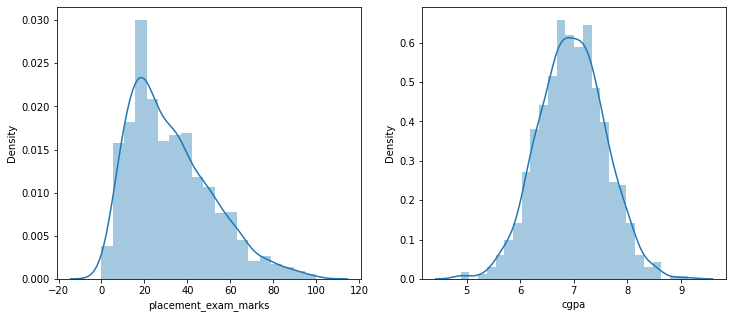

In [ ]:
#distplot of 'cgpa' and 'placement_exam_marks'
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.distplot(data['placement_exam_marks'])
plt.subplot(1,2,2)
sns.distplot(data['cgpa'])
plt.show()

#observation-->'cgpa' is sort of normally distributed
#observation-->'placement_exam_marks' is right skewed and has right outliers

In [ ]:
data['placement_exam_marks'].skew()

0.8356419499466834

In [ ]:
data.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


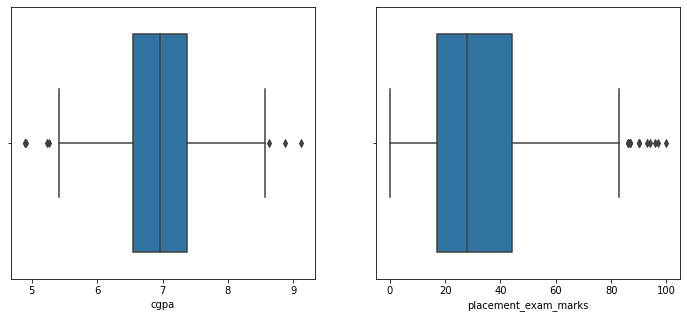

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(data['cgpa'])
plt.subplot(1,2,2)
sns.boxplot(data['placement_exam_marks'])
plt.show()

so here we will focus on 'placement_exam_marks' being right skewed *data*

In [ ]:
data['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [ ]:
# Findig the boundary values

print("Highest Allowed", data['cgpa'].mean() + 3*data['cgpa'].std())
print('Lowest Allowed ', data['cgpa'].mean() - 3*data['cgpa'].std())

Highest Allowed 8.808933625397168
Lowest Allowed  5.113546374602832


In [ ]:
# Finding the outliners

data[(data['cgpa'] > 8.8 )| (data['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [ ]:
# Trimming 
new_data = data[(data['cgpa'] < 8.8) & (data['cgpa'] > 5.11)]
new_data

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [ ]:
# Calculating the Zscore

# Zscore = (val - mean)/std

data['cgpa_zscore'] = (data['cgpa'] - data['cgpa'].mean())/data['cgpa'].std()

In [ ]:
data.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [ ]:
data[(data['cgpa_zscore']> 3) | (data['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [ ]:
# Trimming
new_data = data[(data['cgpa_zscore'] < 3 ) & (data['cgpa_zscore'] > -3)]
new_data

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


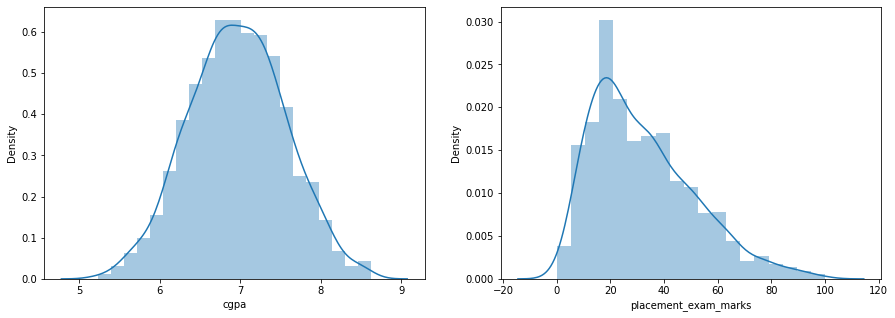

In [ ]:
# new plots
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(new_data['cgpa'])

plt.subplot(1,2,2)
sns.distplot(new_data['placement_exam_marks'])
plt.show()

# Use this method when data distributin is skwed


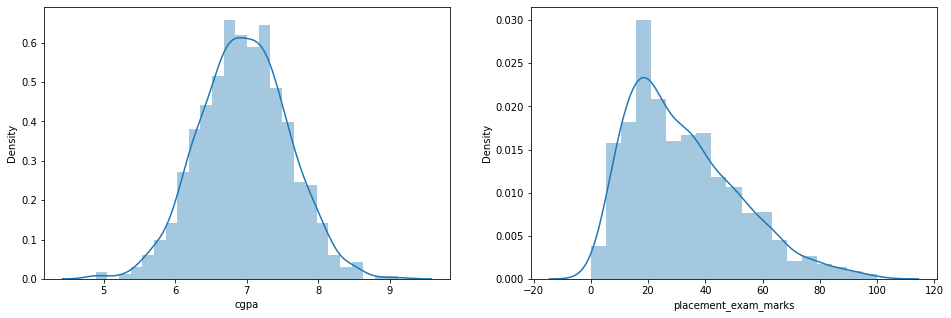

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['cgpa'])

plt.subplot(1,2,2)
sns.distplot(data['placement_exam_marks'])

plt.show()

In [ ]:
data['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

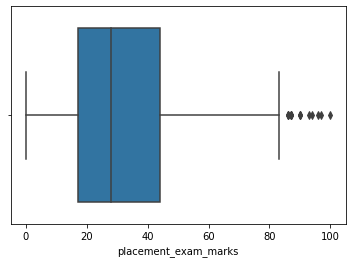

In [ ]:
sns.boxplot(data['placement_exam_marks'])

In [ ]:
# Finding the IQR
percentile25 = data['placement_exam_marks'].quantile(0.25)
percentile75 = data['placement_exam_marks'].quantile(0.75)

In [ ]:
percentile75

44.0

In [ ]:
iqr = percentile75 - percentile25

In [ ]:
iqr

27.0

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


In [ ]:
data[data['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed,cgpa_zscore
9,7.75,94.0,1,1.280667
40,6.60,86.0,1,-0.586526
61,7.51,86.0,0,0.890992
134,6.33,93.0,0,-1.024910
162,7.80,90.0,0,1.361849
283,7.09,87.0,0,0.209061
290,8.38,87.0,0,2.303564
311,6.97,87.0,1,0.014223
324,6.64,90.0,0,-0.521580
630,6.56,96.0,1,-0.651472


In [ ]:
data[data['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed,cgpa_zscore


In [ ]:
#Trimming
new_df = data[data['placement_exam_marks'] < upper_limit]

In [ ]:
new_df.shape

(985, 4)

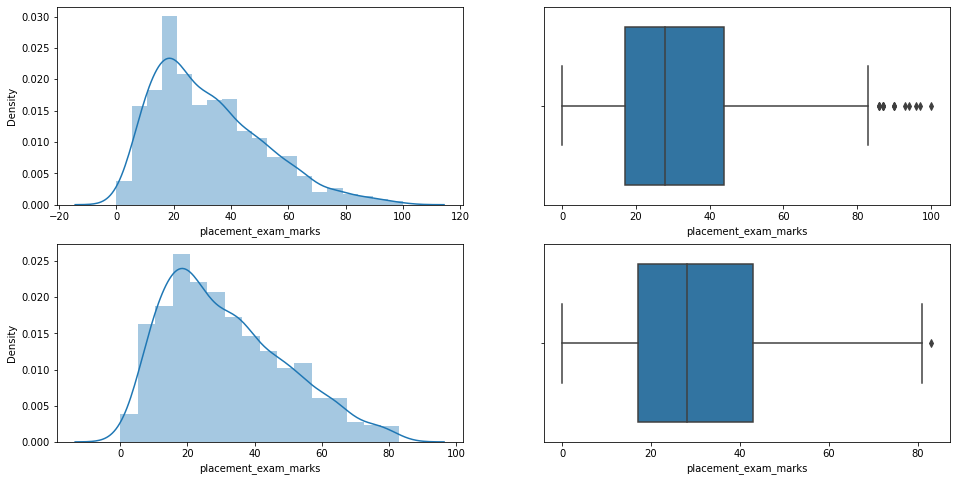

In [ ]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(data['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_data['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_data['placement_exam_marks'])

plt.show()